importing required libraries:

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

importing the dataset:

In [152]:
data_original=pd.read_csv('sales_transactions.csv')

In [154]:
data=data_original.copy()

In [156]:
data

,Order ID,Date,Product,Category,Quantity,Unit Price,Total Sales,Customer ID,Region,Payment Method
0,1000,2024-01-01,Tablet,Electronics,1,409,409,10127,West,Debit Card
1,1001,2024-01-02,Smartwatch,Electronics,2,949,1898,10084,East,Cash
2,1002,2024-01-03,Headphones,Electronics,2,330,660,10041,West,Cash
3,1003,2024-01-04,Smartwatch,Electronics,1,1268,1268,10099,North,Credit Card
4,1004,2024-01-05,Smartwatch,Electronics,3,1268,3804,10040,North,Credit Card
...,...,...,...,...,...,...,...,...,...,...
495,1495,2025-05-10,Tablet,Electronics,3,659,1977,10187,West,Debit Card
496,1496,2025-05-11,Smartphone,Electronics,2,854,1708,10062,East,Cash
497,1497,2025-05-12,Smartphone,Electronics,4,124,496,10116,South,Cash
498,1498,2025-05-13,Smartwatch,Electronics,4,887,3548,10129,South,Credit Card


performing data preprocessing:

In [158]:
data.isnull().sum()

Order ID          0
Date              0
Product           0
Category          0
Quantity          0
Unit Price        0
Total Sales       0
Customer ID       0
Region            0
Payment Method    0
dtype: int64

In [160]:
np.unique(data['Product'])

array(['Headphones', 'Laptop', 'Monitor', 'Smartphone', 'Smartwatch',
       'Tablet'], dtype=object)

In [162]:
products=np.array(['Headphones', 'Laptop', 'Monitor', 'Smartphone', 'Smartwatch','Tablet'])

In [164]:
data=data.values

In [166]:
for i in range(6):
    data[:,2]=np.where(data[:,2]==products[i],
                      i,data[:,2])

In [168]:
data

array([[1000, '2024-01-01', 5, ..., 10127, 'West', 'Debit Card'],
       [1001, '2024-01-02', 4, ..., 10084, 'East', 'Cash'],
       [1002, '2024-01-03', 0, ..., 10041, 'West', 'Cash'],
       ...,
       [1497, '2025-05-12', 3, ..., 10116, 'South', 'Cash'],
       [1498, '2025-05-13', 4, ..., 10129, 'South', 'Credit Card'],
       [1499, '2025-05-14', 5, ..., 10087, 'South', 'Debit Card']],
      dtype=object)

In [170]:
header = np.genfromtxt('sales_transactions.csv', delimiter=',', max_rows=1, dtype=str, autostrip=True)
header

array(['Order ID', 'Date', 'Product', 'Category', 'Quantity',
       'Unit Price', 'Total Sales', 'Customer ID', 'Region',
       'Payment Method'], dtype='<U14')

In [172]:
header[2]='product ID'
header

array(['Order ID', 'Date', 'product ID', 'Category', 'Quantity',
       'Unit Price', 'Total Sales', 'Customer ID', 'Region',
       'Payment Method'], dtype='<U14')

In [174]:
np.unique(data[:,3])

array(['Electronics'], dtype=object)

In [176]:
np.unique(data[:,8])

array(['East', 'North', 'South', 'West'], dtype=object)

In [178]:
regions=np.array(['North','South','East','West'])

In [180]:
for i in range(4):
    data[:,8]=np.where(data[:,8]==regions[i],i,data[:,8])

data

array([[1000, '2024-01-01', 5, ..., 10127, 3, 'Debit Card'],
       [1001, '2024-01-02', 4, ..., 10084, 2, 'Cash'],
       [1002, '2024-01-03', 0, ..., 10041, 3, 'Cash'],
       ...,
       [1497, '2025-05-12', 3, ..., 10116, 1, 'Cash'],
       [1498, '2025-05-13', 4, ..., 10129, 1, 'Credit Card'],
       [1499, '2025-05-14', 5, ..., 10087, 1, 'Debit Card']], dtype=object)

In [186]:
np.unique(data[:,9])

array(['Cash', 'Credit Card', 'Debit Card', 'PayPal'], dtype=object)

In [188]:
payment_modes=np.array(['Cash', 'Credit Card', 'Debit Card', 'PayPal'])

In [190]:
for i in range(4):
    data[:,9]=np.where(data[:,9]==payment_modes[i],i,data[:,9])

data

array([[1000, '2024-01-01', 5, ..., 10127, 3, 2],
       [1001, '2024-01-02', 4, ..., 10084, 2, 0],
       [1002, '2024-01-03', 0, ..., 10041, 3, 0],
       ...,
       [1497, '2025-05-12', 3, ..., 10116, 1, 0],
       [1498, '2025-05-13', 4, ..., 10129, 1, 1],
       [1499, '2025-05-14', 5, ..., 10087, 1, 2]], dtype=object)

In [192]:
data_final = np.vstack((header, data))

In [194]:
data_final

array([['Order ID', 'Date', 'product ID', ..., 'Customer ID', 'Region',
        'Payment Method'],
       [1000, '2024-01-01', 5, ..., 10127, 3, 2],
       [1001, '2024-01-02', 4, ..., 10084, 2, 0],
       ...,
       [1497, '2025-05-12', 3, ..., 10116, 1, 0],
       [1498, '2025-05-13', 4, ..., 10129, 1, 1],
       [1499, '2025-05-14', 5, ..., 10087, 1, 2]], dtype=object)

Saving the copy of final dataset as a csv file:

In [ ]:
np.savetxt("sales_transactions_final.csv", data_final, delimiter=",", fmt="%s")

Exploratory Data Analysis (EDA)

In [240]:
total_sales=data[:,6].sum()
print(f"Total sales: {total_sales}")

Total sales: 926004


In [242]:
top_selling_productID = np.bincount(data[:, 2].astype(int)).argmax()
top_selling_product=products[top_selling_productID]
print(f"Top selling product: {top_selling_product}")

Top selling product: Tablet


In [216]:
data_df = pd.read_csv('sales_transactions_final.csv')

In [218]:
data_df

,Order ID,Date,product ID,Category,Quantity,Unit Price,Total Sales,Customer ID,Region,Payment Method
0,1000,2024-01-01,5,Electronics,1,409,409,10127,3,2
1,1001,2024-01-02,4,Electronics,2,949,1898,10084,2,0
2,1002,2024-01-03,0,Electronics,2,330,660,10041,3,0
3,1003,2024-01-04,4,Electronics,1,1268,1268,10099,0,1
4,1004,2024-01-05,4,Electronics,3,1268,3804,10040,0,1
...,...,...,...,...,...,...,...,...,...,...
495,1495,2025-05-10,5,Electronics,3,659,1977,10187,3,2
496,1496,2025-05-11,3,Electronics,2,854,1708,10062,2,0
497,1497,2025-05-12,3,Electronics,4,124,496,10116,1,0
498,1498,2025-05-13,4,Electronics,4,887,3548,10129,1,1


In [222]:
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df

,Order ID,Date,product ID,Category,Quantity,Unit Price,Total Sales,Customer ID,Region,Payment Method
0,1000,2024-01-01,5,Electronics,1,409,409,10127,3,2
1,1001,2024-01-02,4,Electronics,2,949,1898,10084,2,0
2,1002,2024-01-03,0,Electronics,2,330,660,10041,3,0
3,1003,2024-01-04,4,Electronics,1,1268,1268,10099,0,1
4,1004,2024-01-05,4,Electronics,3,1268,3804,10040,0,1
...,...,...,...,...,...,...,...,...,...,...
495,1495,2025-05-10,5,Electronics,3,659,1977,10187,3,2
496,1496,2025-05-11,3,Electronics,2,854,1708,10062,2,0
497,1497,2025-05-12,3,Electronics,4,124,496,10116,1,0
498,1498,2025-05-13,4,Electronics,4,887,3548,10129,1,1


In [224]:
data_df['Year'] = data_df['Date'].dt.year
data_df['Month'] = data_df['Date'].dt.month

In [226]:
data_df

,Order ID,Date,product ID,Category,Quantity,Unit Price,Total Sales,Customer ID,Region,Payment Method,Year,Month
0,1000,2024-01-01,5,Electronics,1,409,409,10127,3,2,2024,1
1,1001,2024-01-02,4,Electronics,2,949,1898,10084,2,0,2024,1
2,1002,2024-01-03,0,Electronics,2,330,660,10041,3,0,2024,1
3,1003,2024-01-04,4,Electronics,1,1268,1268,10099,0,1,2024,1
4,1004,2024-01-05,4,Electronics,3,1268,3804,10040,0,1,2024,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,2025-05-10,5,Electronics,3,659,1977,10187,3,2,2025,5
496,1496,2025-05-11,3,Electronics,2,854,1708,10062,2,0,2025,5
497,1497,2025-05-12,3,Electronics,4,124,496,10116,1,0,2025,5
498,1498,2025-05-13,4,Electronics,4,887,3548,10129,1,1,2025,5


In [230]:
yearly_revenue = data_df.groupby('Year')['Total Sales'].sum()
yearly_revenue

Year
2024    668324
2025    257680
Name: Total Sales, dtype: int64

In [234]:
monthly_revenue = data_df.groupby(['Year', 'Month'])['Total Sales'].sum()
monthly_revenue

Year  Month
2024  1        64329
      2        44052
      3        52866
      4        57753
      5        57309
      6        44609
      7        52147
      8        61003
      9        54142
      10       70954
      11       58874
      12       50286
2025  1        47249
      2        58847
      3        57450
      4        59298
      5        34836
Name: Total Sales, dtype: int64

In [244]:
customer_revenue = data_df.groupby('Customer ID')['Total Sales'].sum()
average_spending = customer_revenue.mean()
print(f"Average spending per customer: {average_spending}")

Average spending per customer: 4951.893048128342


In [248]:
customer_purchase_count = data_df.groupby('Customer ID').size()
repeat_customers = customer_purchase_count[customer_purchase_count > 1]
print(f"Number of customers: {len(customer_purchase_count)}")
print(f"Number of repeat customers: {len(repeat_customers)}")

Number of customers: 187
Number of repeat customers: 140


In [252]:
data_df.head()

,Order ID,Date,product ID,Category,Quantity,Unit Price,Total Sales,Customer ID,Region,Payment Method,Year,Month
0,1000,2024-01-01,5,Electronics,1,409,409,10127,3,2,2024,1
1,1001,2024-01-02,4,Electronics,2,949,1898,10084,2,0,2024,1
2,1002,2024-01-03,0,Electronics,2,330,660,10041,3,0,2024,1
3,1003,2024-01-04,4,Electronics,1,1268,1268,10099,0,1,2024,1
4,1004,2024-01-05,4,Electronics,3,1268,3804,10040,0,1,2024,1


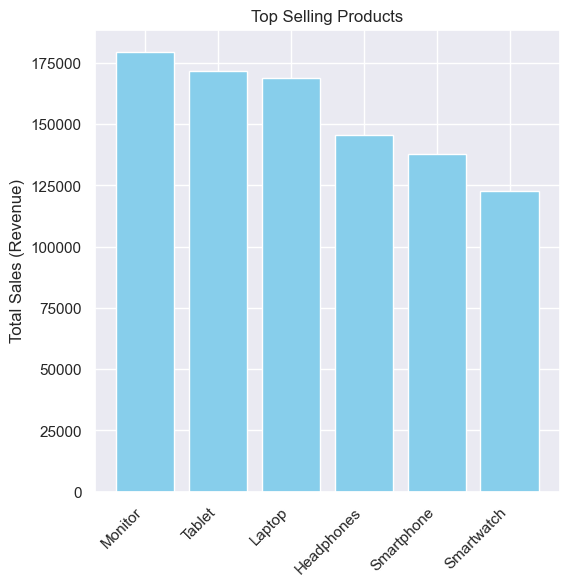

In [278]:
plt.figure(figsize=(6,6))
top_selling_products = data_df.groupby('product ID')['Total Sales'].sum().sort_values(ascending=False)
product_names = [products[i] for i in top_selling_products.keys()]
plt.bar(product_names, top_selling_products, color='skyblue')
plt.title('Top Selling Products')
plt.ylabel('Total Sales (Revenue)')
plt.xticks(rotation=45, ha='right')
plt.show()

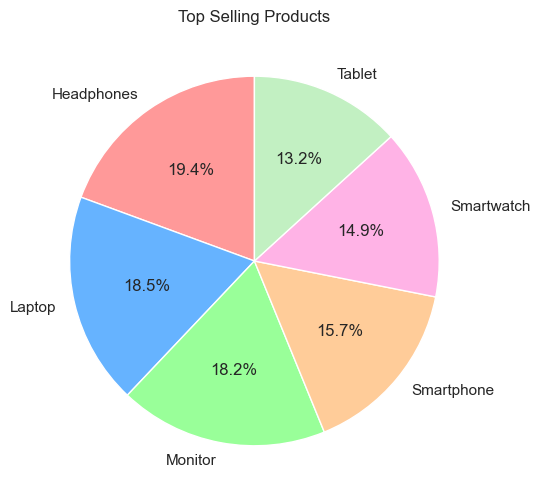

In [305]:
import matplotlib.pyplot as plt
import pandas as pd

top_selling_products = {
    'Headphones': 179546,
    'Laptop': 171740,
    'Monitor': 168883,
    'Smartphone': 145482,
    'Smartwatch': 137725,
    'Tablet': 122628
}
df_top_selling_products = pd.DataFrame(list(top_selling_products.items()), columns=['Product', 'Total Sales'])
plt.figure(figsize=(6, 6))
plt.pie(df_top_selling_products['Total Sales'], labels=df_top_selling_products['Product'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffb3e6','#c2f0c2'])
plt.title('Top Selling Products')
plt.ylabel('') 
plt.show()


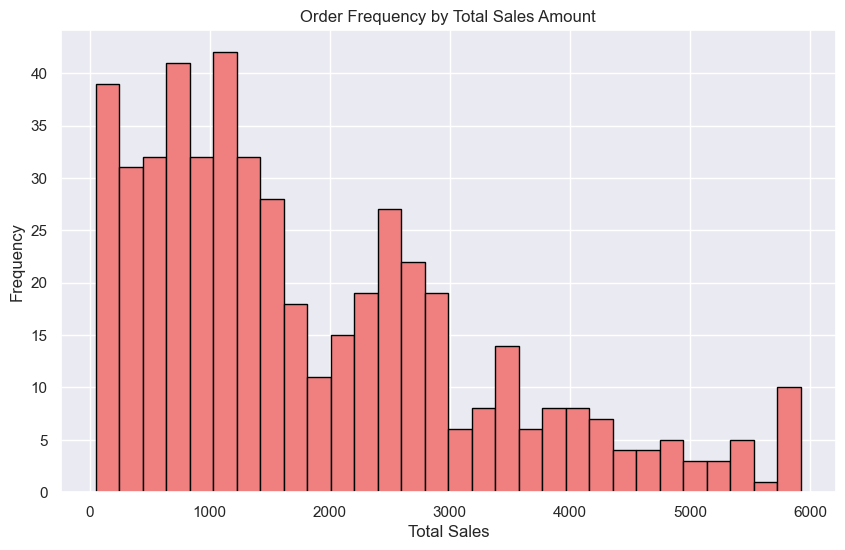

In [311]:
plt.figure(figsize=(10, 6))
plt.hist(data_df['Total Sales'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Order Frequency by Total Sales Amount')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

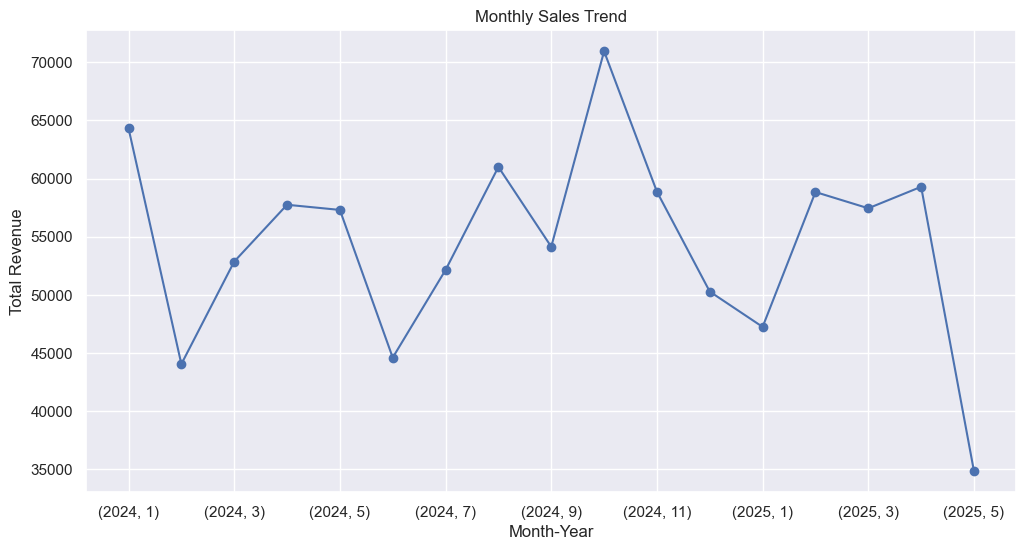

In [317]:
monthly_sales = data_df.groupby(['Year', 'Month'])['Total Sales'].sum()
monthly_sales.plot(kind='line', figsize=(12, 6), marker='o', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


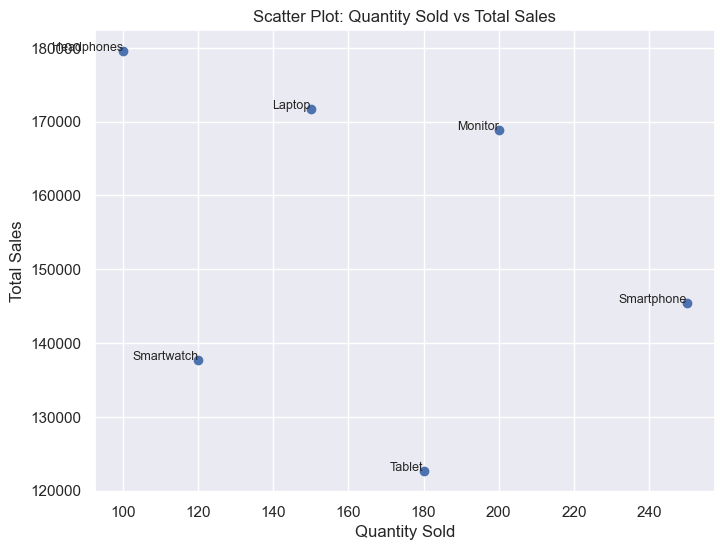

In [333]:
products = ['Headphones', 'Laptop', 'Monitor', 'Smartphone', 'Smartwatch', 'Tablet']
quantity_sold = [100, 150, 200, 250, 120, 180]
total_sales = [179546, 171740, 168883, 145482, 137725, 122628]
plt.figure(figsize=(8, 6))
plt.scatter(quantity_sold, total_sales, color='b', marker='o')
plt.title('Scatter Plot: Quantity Sold vs Total Sales')
plt.xlabel('Quantity Sold')
plt.ylabel('Total Sales')
for i, product in enumerate(products):
    plt.text(quantity_sold[i], total_sales[i], product, fontsize=9, ha='right')

plt.grid(True)
plt.show()